In [9]:
import json

def show_json(message, obj):
    display(message, json.loads(obj.model_dump_json()))   

In [10]:
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv
import json, os
import requests
from PIL import Image

#_ : bool = load_dotenv("C:/Data/Skill Learning/Web3Meta/Python/GenAI/.env") 
# _ stores the returned value temporarily not to be used later
_ : bool = load_dotenv(find_dotenv()) # read local .env file


client : OpenAI = OpenAI()
api_key = os.getenv("FMP_API_KEY")


In [11]:
# Define financial statement functions
def get_income_statement(ticker:str, period, limit:int):
    
    url : str = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?period={period}&limit={limit}&apikey={api_key}"
    response : requests.Response = requests.get(url)
    return json.dumps(response.json())

#get_income_statement("AAPL","annual", 2)


def get_balance_sheet(ticker:str, period, limit:int):
    
    url : str = f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?period={period}&limit={limit}&apikey={api_key}"
    response : requests.Response = requests.get(url)
    return json.dumps(response.json())

#get_balance_sheet("AAPL","annual", 2)


def get_cash_flow_statement(ticker:str, period, limit:int):
    
    url : str = f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{ticker}?period={period}&limit={limit}&apikey={api_key}"
    response : requests.Response = requests.get(url)
    return json.dumps(response.json())

#get_cash_flow_statement("AAPL","annual", 2)


def get_key_metrics(ticker:str, period, limit:int):
    
    url : str = f"https://financialmodelingprep.com/api/v3/key-metrics/{ticker}?period={period}&limit={limit}&apikey={api_key}"
    response : requests.Response = requests.get(url)
    return json.dumps(response.json())

#get_key_metrics("AAPL","annual", 2)


def get_financial_ratios(ticker:str, period, limit:int):
    
    url : str = f"https://financialmodelingprep.com/api/v3/ratios/{ticker}?period={period}&limit={limit}&apikey={api_key}"
    response : requests.Response = requests.get(url)
    return json.dumps(response.json())

#get_financial_ratios("AAPL","annual", 2)


def get_financial_growth(ticker:str, period, limit:int):
    
    url : str = f"https://financialmodelingprep.com/api/v3/financial-growth/{ticker}?period={period}&limit={limit}&apikey={api_key}"
    response : requests.Response = requests.get(url)
    return json.dumps(response.json())

#get_financial_growth("AAPL","annual", 2)

In [12]:
def download_and_save_image(file_id:str, save_path:str) -> None:
    
    download_url : str = f"https://api.openai.com/v1/files/{file_id}/content"

    response : requests.Response = requests.get(download_url, headers={"Authorization": f"Bearer {os.environ.get("OPENAI_API_KEY")}"})

    if response.status_code == 200:
        with open(save_path, 'wb') as file:
            file.write(response.content)
        print(f"Image downloaded and saved to {save_path}")
    else:
        print(f"Failed to download image: HTTP Status Code {response.status_code}")

In [13]:
# Map available functions
available_functions = {
    "get_income_statement": get_income_statement,
    "get_balance_sheet": get_balance_sheet,
    "get_cash_flow_statement": get_cash_flow_statement,
    "get_key_metrics": get_key_metrics,
    "get_financial_ratios": get_cash_flow_statement,
    "get_financial_growth": get_financial_ratios
}

In [14]:
from openai.types.beta import Assistant


  # Creating an assistant with specific instructions and tools
assistant : Assistant = client.beta.assistants.create(
      instructions="Act as a financial analyst by accessing detailed financial data through the Financial Modeling Prep API. Your capabilities include analyzing key metrics, comprehensive financial statements, vital financial ratios, and tracking financial growth trends. ",
      model="gpt-3.5-turbo-1106",
  tools = [
            {"type": "code_interpreter"},
            {"type": "function", "function": {"name": "get_income_statement","description": "Get company's income statement", "parameters": {"type": "object", "properties": {"ticker": {"type": "string"}, "period": {"type": "string"}, "limit": {"type": "integer"}},"required": ["period"]}}},
            {"type": "function", "function": {"name": "get_balance_sheet","description": "Get company's balance sheet statement", "parameters": {"type": "object", "properties": {"ticker": {"type": "string"}, "period": {"type": "string"}, "limit": {"type": "integer"}},"required": ["period"]}}},
            {"type": "function", "function": {"name": "get_cash_flow_statement","description": "Get company's cash flow statement", "parameters": {"type": "object", "properties": {"ticker": {"type": "string"}, "period": {"type": "string"}, "limit": {"type": "integer"}},"required": ["period"]}}},
            {"type": "function", "function": {"name": "get_key_metrics","description": "Get company's key metrics", "parameters": {"type": "object", "properties": {"ticker": {"type": "string"}, "period": {"type": "string"}, "limit": {"type": "integer"}},"required": ["period"]}}},
            {"type": "function", "function": {"name": "get_financial_ratios","description": "Get company's financial ratios", "parameters": {"type": "object", "properties": {"ticker": {"type": "string"}, "period": {"type": "string"}, "limit": {"type": "integer"}},"required": ["period"]}}},
            {"type": "function", "function": {"name": "get_financial_growth","description": "Get company's financial growth", "parameters": {"type": "object", "properties": {"ticker": {"type": "string"}, "period": {"type": "string"}, "limit": {"type": "integer"}},"required": ["period"]}}},
          ])

# Creating a new thread
from openai.types.beta.thread import Thread

thread : Thread = client.beta.threads.create()

#user_message : str = 'Can you compare the financial health of Microsoft and Apple over the last two years, based only on their balance sheets and financial ratios. Also visualize the results with one or more charts?'

user_message : str = "Evaluate Microsoft vs. Googles's revenue growth over the past 4 years using balance sheet and key metrics. Visualize the results with one or more charts."

# Adding a user message to the thread

from openai.types.beta.threads.thread_message import ThreadMessage

message : ThreadMessage = client.beta.threads.messages.create(
    thread_id = thread.id,
    role = "user",
    content = user_message
  )

# Running the assistant on the created thread
from openai.types.beta.threads.run import Run

run : Run = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant.id)

dict(run)
import time
from IPython.display import Image, display

  # Loop until the run completes or requires action
while True:
    runStatus = client.beta.threads.runs.retrieve(thread_id=thread.id,
                                                  run_id=run.id)
    # Add run steps retrieval here for debuging
    run_steps = client.beta.threads.runs.steps.list(thread_id=thread.id, run_id=run.id)
    # show_json("Run Steps:", run_steps)
    print(runStatus.status ,'.....')

    # This means run is making a function call   
    if runStatus.status == "requires_action":
        print(runStatus.status ,'.....')
        print("Status: ", "requires_action")
        show_json("submit_tool_outputs", runStatus.required_action)
        
        print("toolCalls present:")
        toolCalls = runStatus.required_action.submit_tool_outputs.tool_calls

        tool_outputs = []
        for toolcall in toolCalls:
          function_name = toolcall.function.name
          function_args = json.loads(toolcall.function.arguments)
            
          if function_name in available_functions:
            function_to_call = available_functions[function_name]
                
            response = function_to_call(**function_args)
            tool_outputs.append({
                              "tool_call_id": toolcall.id,
                              "output": response
                          })             
                
        print(tool_outputs,">>>>>") 
        # Submit tool outputs and update the run
        client.beta.threads.runs.submit_tool_outputs(
            thread_id=thread.id,
            run_id=run.id,
            tool_outputs=tool_outputs)
      
    elif runStatus.status == "completed":
        # List the messages to get the response
      print("completed...........logic")
      messages: list[ThreadMessage] = client.beta.threads.messages.list(thread_id=thread.id)
      #show_json("messages:",messages)
        
      for message in messages.data:
        role_label = "User" if message.role == "user" else "Assistant"
        for content in message.content:
          if content.type == "text":
            message_content = content.text.value
            print(f"{role_label}: {message_content}\n")
          # Exit the loop after processing the completed run
            # Check the type of message content and handle accordingly
            
          elif content.type == "image_file":
            #display(message)
            # Handle image file content, e.g., print the file ID or download the image
            image_file_id = content.image_file.file_id
            #display(image_file_id)
            # Define a path to save the image
            image_save_path = f"./image_{image_file_id}.png"
            # Download and save the image
            download_and_save_image(image_file_id, image_save_path)
            #image  = Image.open(image_save_path)
            #image.show()
            display(Image(filename=image_save_path))
      break

    elif run.status == "failed":
      print("Run failed.")
      break

    elif run.status in ["in_progress", "queued"]:
      print(f"Run is {run.status}. Waiting...")
      time.sleep(5)  # Wait for 5 seconds before checking again

    else:
      print(f"Unexpected status: {run.status}")
      break



In [15]:
from openai.types.beta.thread import Thread
from openai.types.beta.threads.thread_message import ThreadMessage
from openai.types.beta.threads.run import Run
#dict(run)
import time
from IPython.display import Image, display

def thread_msg_run(user_message : str):
    
    thread : Thread = client.beta.threads.create()
    
    message : ThreadMessage = client.beta.threads.messages.create(
        thread_id = thread.id,
        role = "user",
        content = user_message
    )

    run : Run = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant.id)

    while True:
      runStatus = client.beta.threads.runs.retrieve(thread_id=thread.id,
                                                  run_id=run.id)
      # Add run steps retrieval here for debuging
      run_steps = client.beta.threads.runs.steps.list(thread_id=thread.id, run_id=run.id)
      # show_json("Run Steps:", run_steps)
      print(runStatus.status ,'.....')

      # This means run is making a function call   
      if runStatus.status == "requires_action":
        print(runStatus.status ,'.....')
        print("Status: ", "requires_action")
        show_json("submit_tool_outputs", runStatus.required_action)
        
        print("toolCalls present:")
        toolCalls = runStatus.required_action.submit_tool_outputs.tool_calls

        tool_outputs = []
        for toolcall in toolCalls:
          function_name = toolcall.function.name
          function_args = json.loads(toolcall.function.arguments)
            
          if function_name in available_functions:
            function_to_call = available_functions[function_name]
                
            response = function_to_call(**function_args)
            tool_outputs.append({
                              "tool_call_id": toolcall.id,
                              "output": response
                          })             
                
        print(tool_outputs,">>>>>") 
        # Submit tool outputs and update the run
        client.beta.threads.runs.submit_tool_outputs(
            thread_id=thread.id,
            run_id=run.id,
            tool_outputs=tool_outputs)
      
      elif runStatus.status == "completed":
        # List the messages to get the response
        print("completed...........logic")
        messages: list[ThreadMessage] = client.beta.threads.messages.list(thread_id=thread.id)
        #show_json("messages:",messages)
        
        for message in messages.data:
          role_label = "User" if message.role == "user" else "Assistant"
          for content in message.content:
            if content.type == "text":
              message_content = content.text.value
              print(f"{role_label}: {message_content}\n")
              # Exit the loop after processing the completed run
              # Check the type of message content and handle accordingly
              
            elif content.type == "image_file":
              #display(message)
              # Handle image file content, e.g., print the file ID or download the image
              image_file_id = content.image_file.file_id
              #display(image_file_id)
              # Define a path to save the image
              image_save_path = f"./image_{image_file_id}.png"
              # Download and save the image
              download_and_save_image(image_file_id, image_save_path)
              #image  = Image.open(image_save_path)
              #image.show()
              display(Image(filename=image_save_path))
        break

      elif run.status == "failed":
        print("Run failed.")
        break

      elif run.status in ["in_progress", "queued"]:
        print(f"Run is {run.status}. Waiting...")
        time.sleep(5)  # Wait for 5 seconds before checking again

      else:
        print(f"Unexpected status: {run.status}")
        break

in_progress .....
Run is queued. Waiting...
requires_action .....
requires_action .....
Status:  requires_action


'submit_tool_outputs'

{'submit_tool_outputs': {'tool_calls': [{'id': 'call_NGuKllYE5AphKO2rdsIsYyRQ',
    'function': {'arguments': '{"ticker": "MSFT", "period": "annual", "limit": 4}',
     'name': 'get_balance_sheet'},
    'type': 'function'},
   {'id': 'call_YzGEuqzOKzAsYRDPFLrq8VEF',
    'function': {'arguments': '{"ticker": "GOOGL", "period": "annual", "limit": 4}',
     'name': 'get_balance_sheet'},
    'type': 'function'},
   {'id': 'call_tFLy7DEM0SbSuk8Ew9KNAc7E',
    'function': {'arguments': '{"ticker": "MSFT", "period": "annual", "limit": 4}',
     'name': 'get_key_metrics'},
    'type': 'function'},
   {'id': 'call_TzuyYjZnGYkXw3HSnJZBlKaQ',
    'function': {'arguments': '{"ticker": "GOOGL", "period": "annual", "limit": 4}',
     'name': 'get_key_metrics'},
    'type': 'function'}]},
 'type': 'submit_tool_outputs'}

toolCalls present:
[{'tool_call_id': 'call_NGuKllYE5AphKO2rdsIsYyRQ', 'output': '[{"date": "2023-06-30", "symbol": "MSFT", "reportedCurrency": "USD", "cik": "0000789019", "fillingDate": "2023-07-27", "acceptedDate": "2023-07-27 16:01:56", "calendarYear": "2023", "period": "FY", "cashAndCashEquivalents": 34704000000, "shortTermInvestments": 76558000000, "cashAndShortTermInvestments": 111262000000, "netReceivables": 48688000000, "inventory": 2500000000, "otherCurrentAssets": 21807000000, "totalCurrentAssets": 184257000000, "propertyPlantEquipmentNet": 109987000000, "goodwill": 67886000000, "intangibleAssets": 9366000000, "goodwillAndIntangibleAssets": 77252000000, "longTermInvestments": 9879000000, "taxAssets": 0, "otherNonCurrentAssets": 30601000000, "totalNonCurrentAssets": 227719000000, "otherAssets": 0, "totalAssets": 411976000000, "accountPayables": 18095000000, "shortTermDebt": 5247000000, "taxPayables": 4152000000, "deferredRevenue": 50901000000, "otherCurrentLiabilities": 2990600

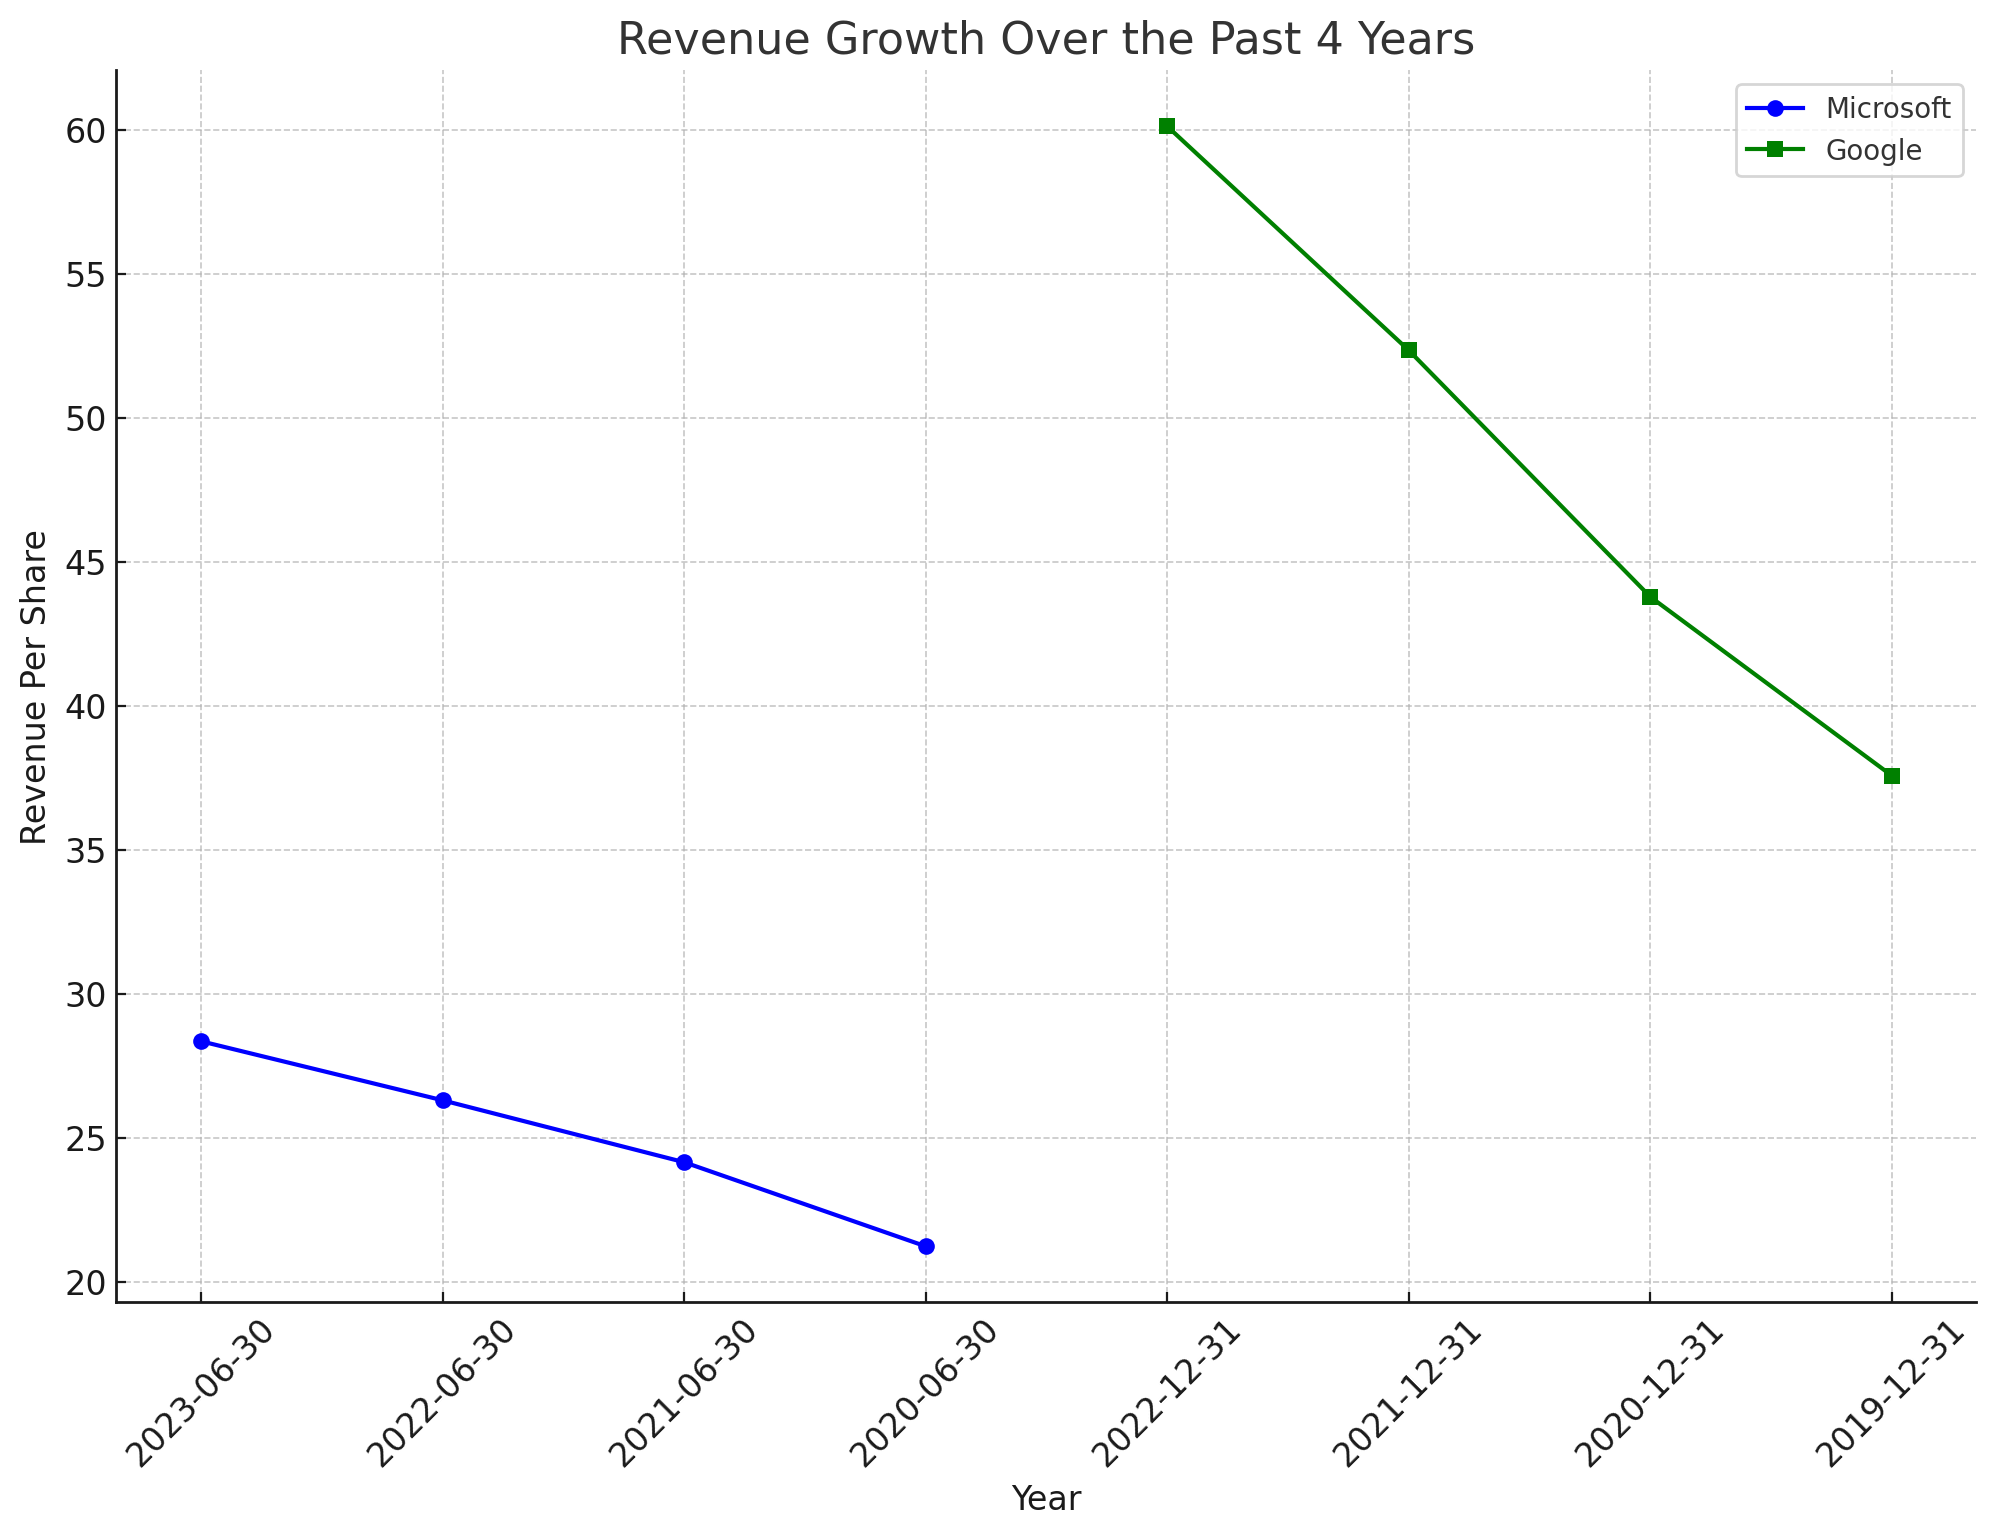

Assistant: The chart above visualizes the revenue growth per share for both Microsoft (blue) and Google (green) over the past 4 years. As we can see, both companies have experienced a consistent growth in revenue.

If there is anything else you would like to analyze or visualize, feel free to let me know!

Assistant: The data for Microsoft and Google has been retrieved, including balance sheet information and key financial metrics. I will now analyze this data to evaluate the revenue growth over the past 4 years for both companies.

User: Evaluate Microsoft vs. Googles's revenue growth over the past 4 years using balance sheet and key metrics only. Visualize the results with one or more charts.



In [16]:
thread_msg_run("Evaluate Microsoft vs. Googles's revenue growth over the past 4 years using balance sheet and key metrics only. Visualize the results with one or more charts.")

in_progress .....
Run is queued. Waiting...
requires_action .....
requires_action .....
Status:  requires_action


'submit_tool_outputs'

{'submit_tool_outputs': {'tool_calls': [{'id': 'call_r746ptUP64dtPANcX0mqEe1t',
    'function': {'arguments': '{"ticker": "MSFT", "period": "annual", "limit": 4}',
     'name': 'get_balance_sheet'},
    'type': 'function'},
   {'id': 'call_AFwmUQ049ktYqY5p1A7I7CR9',
    'function': {'arguments': '{"ticker": "GOOGL", "period": "annual", "limit": 4}',
     'name': 'get_balance_sheet'},
    'type': 'function'},
   {'id': 'call_OMVFlMZihE8qrq3SNOjWm3VE',
    'function': {'arguments': '{"ticker": "MSFT", "period": "annual", "limit": 4}',
     'name': 'get_key_metrics'},
    'type': 'function'},
   {'id': 'call_YhQJAsNvhRESajJXLvDI7R6y',
    'function': {'arguments': '{"ticker": "GOOGL", "period": "annual", "limit": 4}',
     'name': 'get_key_metrics'},
    'type': 'function'}]},
 'type': 'submit_tool_outputs'}

toolCalls present:
[{'tool_call_id': 'call_r746ptUP64dtPANcX0mqEe1t', 'output': '[{"date": "2023-06-30", "symbol": "MSFT", "reportedCurrency": "USD", "cik": "0000789019", "fillingDate": "2023-07-27", "acceptedDate": "2023-07-27 16:01:56", "calendarYear": "2023", "period": "FY", "cashAndCashEquivalents": 34704000000, "shortTermInvestments": 76558000000, "cashAndShortTermInvestments": 111262000000, "netReceivables": 48688000000, "inventory": 2500000000, "otherCurrentAssets": 21807000000, "totalCurrentAssets": 184257000000, "propertyPlantEquipmentNet": 109987000000, "goodwill": 67886000000, "intangibleAssets": 9366000000, "goodwillAndIntangibleAssets": 77252000000, "longTermInvestments": 9879000000, "taxAssets": 0, "otherNonCurrentAssets": 30601000000, "totalNonCurrentAssets": 227719000000, "otherAssets": 0, "totalAssets": 411976000000, "accountPayables": 18095000000, "shortTermDebt": 5247000000, "taxPayables": 4152000000, "deferredRevenue": 50901000000, "otherCurrentLiabilities": 2990600

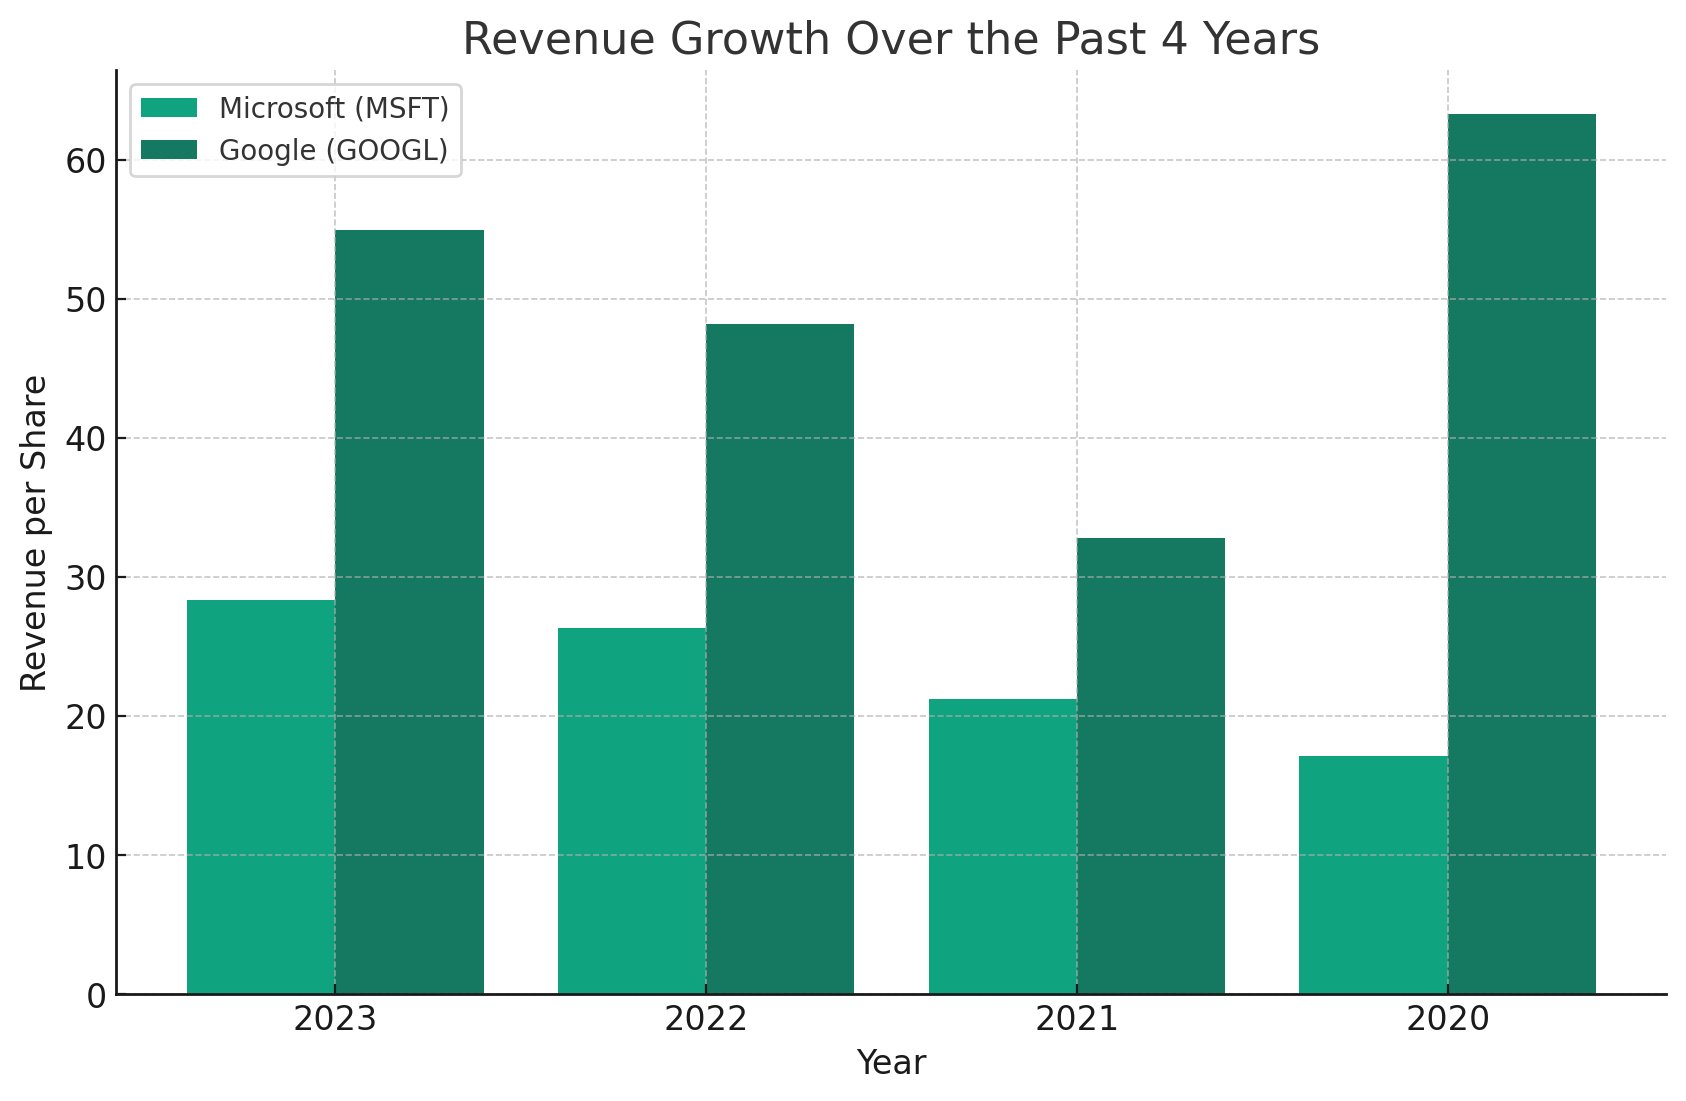

Assistant: The bar chart above visualizes the revenue growth of Microsoft (MSFT) and Google (GOOGL) over the past 4 years. As observed, both companies have experienced growth in their revenue per share, with Google showing higher values compared to Microsoft. This indicates a positive trend in revenue growth for both companies over the specified period.

Assistant: The financial data for Microsoft (MSFT) and Google (GOOGL) has been retrieved. Now, I will proceed with analyzing the revenue growth over the past 4 years using balance sheet and key metrics.

User: Evaluate Microsoft vs. Googles's revenue growth over the past 4 years using balance sheet and key metrics only. Visualize the results with one or more bar charts.



In [22]:
thread_msg_run("Evaluate Microsoft vs. Googles's revenue growth over the past 4 years using balance sheet and key metrics only. Visualize the results with one or more bar charts.")